In [4]:
!pip install tensorflow matplotlib seaborn scikit-learn

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, InceptionV3, EfficientNetB0
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os, zipfile
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [6]:
# ================================================
# 2. Upload & Prepare Dataset
# ================================================
from google.colab import files
uploaded = files.upload()  # Upload your fish dataset zip

KeyboardInterrupt: 

In [7]:
# Unzip dataset
zip_path = '/content/Dataset.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

In [8]:
!ls data

images.cv_jzk6llhf18tm3k0kyttxz


In [9]:
train_dir = '/content/data/images.cv_jzk6llhf18tm3k0kyttxz/data/test'
val_dir = '/content/data/images.cv_jzk6llhf18tm3k0kyttxz/data/val'
tesr_dir='/content/data/images.cv_jzk6llhf18tm3k0kyttxz/data/train'

In [10]:
# Image size (224 for most models, 299 for InceptionV3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [11]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

NUM_CLASSES = train_gen.num_classes
test_gen = val_datagen.flow_from_directory(
    tesr_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)
NUM_CLASSES = test_gen.num_classes

Found 3187 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 6225 images belonging to 11 classes.


In [2]:
# ================================================
# 3. Helper Functions
# ================================================
def plot_history(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()
def evaluate_model(model, val_gen, model_name):
    val_gen.reset()
    preds = model.predict(val_gen, verbose=0)
    y_pred = np.argmax(preds, axis=1)
    y_true = val_gen.classes
    target_names = list(val_gen.class_indices.keys())

    print(f"=== {model_name} ===")
    print(classification_report(y_true, y_pred, target_names=target_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    accuracy = np.mean(y_pred == y_true)
    return accuracy


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1678 - loss: 2.2897

100/100 ━━━━━━━━━━━━━━━━━━━━ 378s 4s/step - accuracy: 0.1680 - loss: 2.2887 - val_accuracy: 0.2875 - val_loss: 1.9322 - learning_rate: 0.0010
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3324 - loss: 1.8039

100/100 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.3329 - loss: 1.8029 - val_accuracy: 0.4625 - val_loss: 1.5237 - learning_rate: 0.0010
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4787 - loss: 1.4556

100/100 ━━━━━━━━━━━━━━━━━━━━ 366s 4s/step - accuracy: 0.4788 - loss: 1.4554 - val_accuracy: 0.5705 - val_loss: 1.2955 - learning_rate: 0.0010
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.5533 - loss: 1.2896 - val_accuracy: 0.5476 - val_loss: 1.2363 - learning_rate: 0.0010
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5753 - loss: 1.1862

100/100 ━━━━━━━━━━━━━━━━━━━━ 366s 4s/step - accuracy: 0.5754 - loss: 1.1859 - val_accuracy: 0.6200 - val_loss: 1.0648 - learning_rate: 0.0010
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6066 - loss: 1.0811

100/100 ━━━━━━━━━━━━━━━━━━━━ 375s 4s/step - accuracy: 0.6067 - loss: 1.0807 - val_accuracy: 0.6429 - val_loss: 1.0175 - learning_rate: 0.0010
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.6635 - loss: 0.9346 - val_accuracy: 0.6053 - val_loss: 0.9846 - learning_rate: 0.0010
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.6600 - loss: 0.9249 - val_accuracy: 0.5815 - val_loss: 1.0387 - learning_rate: 0.0010
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 371s 4s/step - accuracy: 0.6565 - loss: 0.9021 - val_accuracy: 0.6355 - val_loss: 0.9624 - learning_rate: 0.0010
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6735 - loss: 0.8358

100/100 ━━━━━━━━━━━━━━━━━━━━ 374s 4s/step - accuracy: 0.6737 - loss: 0.8354 - val_accuracy: 0.7198 - val_loss: 0.7871 - learning_rate: 0.0010
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 378s 4s/step - accuracy: 0.7026 - loss: 0.7783 - val_accuracy: 0.6813 - val_loss: 0.8256 - learning_rate: 0.0010
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6921 - loss: 0.7938

100/100 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.6922 - loss: 0.7935 - val_accuracy: 0.7244 - val_loss: 0.7343 - learning_rate: 0.0010
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.7216 - loss: 0.7212 - val_accuracy: 0.7152 - val_loss: 0.7398 - learning_rate: 0.0010
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7465 - loss: 0.6644

100/100 ━━━━━━━━━━━━━━━━━━━━ 386s 4s/step - accuracy: 0.7466 - loss: 0.6644 - val_accuracy: 0.7463 - val_loss: 0.7055 - learning_rate: 0.0010
Epoch 15/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7285 - loss: 0.7004

100/100 ━━━━━━━━━━━━━━━━━━━━ 378s 4s/step - accuracy: 0.7286 - loss: 0.7002 - val_accuracy: 0.7555 - val_loss: 0.6350 - learning_rate: 0.0010
Epoch 16/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7682 - loss: 0.6155

100/100 ━━━━━━━━━━━━━━━━━━━━ 367s 4s/step - accuracy: 0.7683 - loss: 0.6154 - val_accuracy: 0.7766 - val_loss: 0.6266 - learning_rate: 0.0010
Epoch 17/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 400s 4s/step - accuracy: 0.7857 - loss: 0.5762 - val_accuracy: 0.7656 - val_loss: 0.6221 - learning_rate: 0.0010
Epoch 18/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7811 - loss: 0.5675

100/100 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.7811 - loss: 0.5675 - val_accuracy: 0.8159 - val_loss: 0.4953 - learning_rate: 0.0010
Epoch 19/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8281 - loss: 0.4739

100/100 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.8281 - loss: 0.4739 - val_accuracy: 0.8223 - val_loss: 0.4869 - learning_rate: 0.0010
Epoch 20/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8312 - loss: 0.4697

100/100 ━━━━━━━━━━━━━━━━━━━━ 373s 4s/step - accuracy: 0.8312 - loss: 0.4697 - val_accuracy: 0.8407 - val_loss: 0.4398 - learning_rate: 0.0010


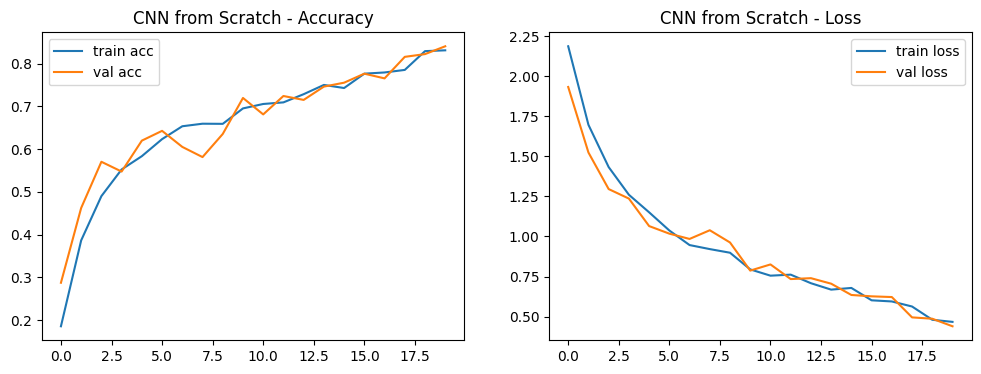

=== CNN from Scratch ===
                                  precision    recall  f1-score   support

                     animal fish       0.94      0.94      0.94       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.83      0.99      0.90       105
   fish sea_food gilt_head_bream       0.82      0.49      0.61        94
   fish sea_food hourse_mackerel       0.81      0.77      0.79        97
        fish sea_food red_mullet       0.98      0.92      0.95        90
     fish sea_food red_sea_bream       0.79      0.86      0.82       113
          fish sea_food sea_bass       0.59      0.86      0.70        97
            fish sea_food shrimp       0.99      0.98      0.98       100
fish sea_food striped_red_mullet       0.89      0.92      0.91       101
             fish sea_food trout       0.91      0.64      0.75        98

                        accuracy                           0.84      1092
           

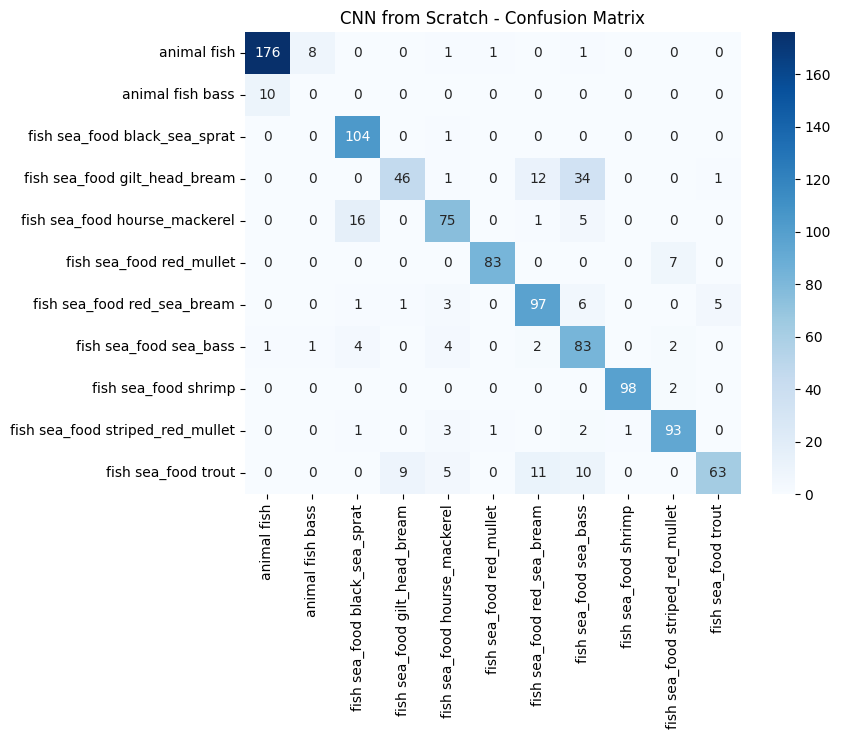

In [22]:
# ================================================
# 4. CNN from Scratch
# ================================================
def build_cnn(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation='relu')(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)
cnn_model = build_cnn((*IMG_SIZE,3), NUM_CLASSES)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    ModelCheckpoint('cnn_best.h5', monitor='val_accuracy', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
]

history_cnn = cnn_model.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks)
plot_history(history_cnn, "CNN from Scratch")
acc_cnn = evaluate_model(cnn_model, val_gen, "CNN from Scratch")


=== Training MobileNetV2 (with fine-tuning) ===
Found 3187 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7470 - loss: 0.8358

100/100 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.7483 - loss: 0.8316 - val_accuracy: 0.9194 - val_loss: 0.2247 - learning_rate: 0.0010
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9659 - loss: 0.1166

100/100 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.9660 - loss: 0.1163 - val_accuracy: 0.9771 - val_loss: 0.0815 - learning_rate: 0.0010
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.9797 - loss: 0.0539 - val_accuracy: 0.9734 - val_loss: 0.0697 - learning_rate: 0.0010


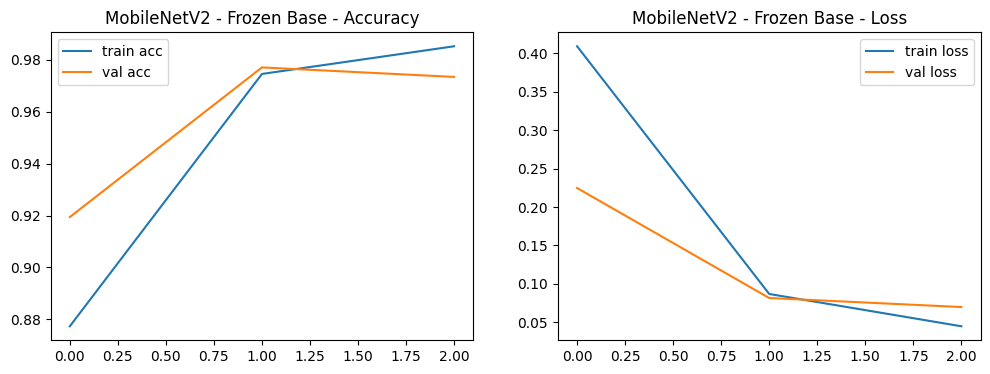

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.4531 - loss: 2.6468 - val_accuracy: 0.9753 - val_loss: 0.0683 - learning_rate: 1.0000e-05
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9193 - loss: 0.2345

100/100 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.9196 - loss: 0.2340 - val_accuracy: 0.9789 - val_loss: 0.0639 - learning_rate: 1.0000e-05
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9719 - loss: 0.0882

100/100 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.9719 - loss: 0.0881 - val_accuracy: 0.9799 - val_loss: 0.0584 - learning_rate: 1.0000e-05
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9786 - loss: 0.0687

100/100 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.9786 - loss: 0.0686 - val_accuracy: 0.9817 - val_loss: 0.0512 - learning_rate: 1.0000e-05
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9851 - loss: 0.0548

100/100 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.9851 - loss: 0.0548 - val_accuracy: 0.9853 - val_loss: 0.0470 - learning_rate: 1.0000e-05


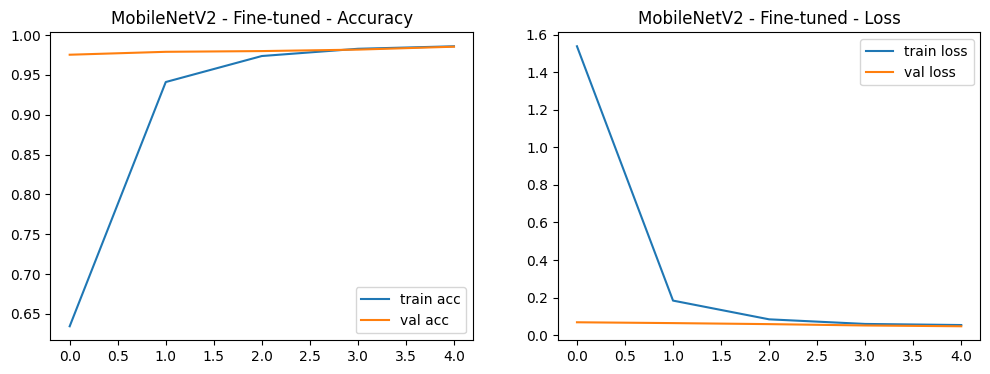

=== MobileNetV2 Fine-tuned ===
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.97      0.98       187
                animal fish bass       1.00      0.70      0.82        10
   fish sea_food black_sea_sprat       0.99      0.99      0.99       105
   fish sea_food gilt_head_bream       0.98      1.00      0.99        94
   fish sea_food hourse_mackerel       1.00      0.98      0.99        97
        fish sea_food red_mullet       0.99      0.97      0.98        90
     fish sea_food red_sea_bream       1.00      0.99      1.00       113
          fish sea_food sea_bass       0.97      1.00      0.98        97
            fish sea_food shrimp       0.98      1.00      0.99       100
fish sea_food striped_red_mullet       0.96      0.99      0.98       101
             fish sea_food trout       1.00      1.00      1.00        98

                        accuracy                           0.99      1092
     

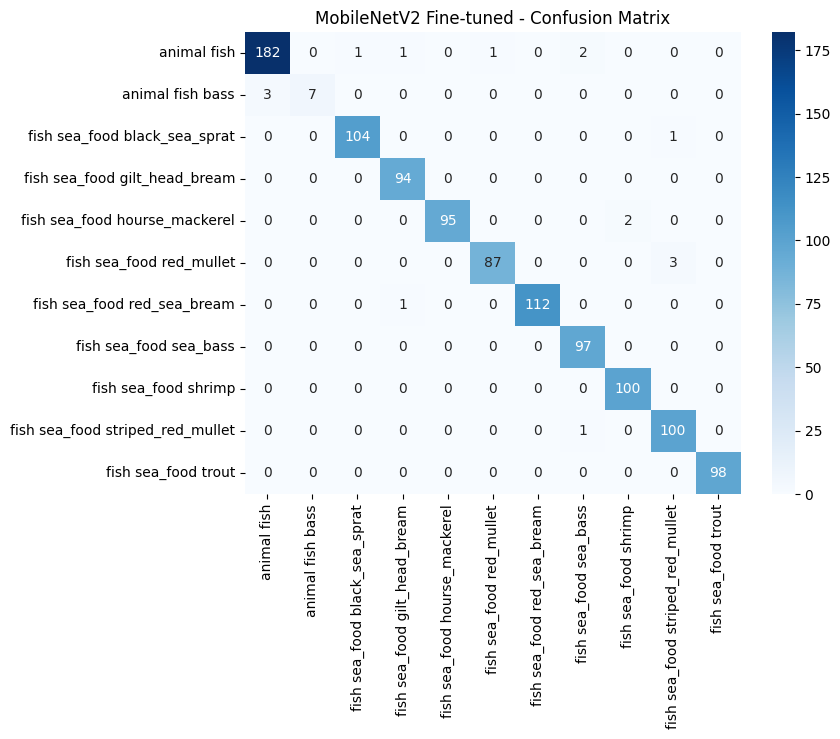

In [12]:
# ================================================
# 5. Transfer Learning (Fast Version - MobileNetV2)
# ================================================

from tensorflow.keras.applications import MobileNetV2

print("\n=== Training MobileNetV2 (with fine-tuning) ===")

# Make sure image size matches MobileNetV2
IMG_SIZE = (224, 224)
train_gen = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# Load base model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(*IMG_SIZE,3))
base_model.trainable = False  # Freeze base model initially

# Build model
inputs = layers.Input(shape=(*IMG_SIZE,3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = models.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    ModelCheckpoint('MobileNetV2_best.h5', monitor='val_accuracy', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
]

# Stage 1: Train frozen base
history = model.fit(train_gen, validation_data=val_gen, epochs=3, callbacks=callbacks)
plot_history(history, "MobileNetV2 - Frozen Base")

# Stage 2: Fine-tune last few layers
base_model.trainable = True
for layer in base_model.layers[:-30]:  # Keep most layers frozen
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_ft = model.fit(train_gen, validation_data=val_gen, epochs=5, callbacks=callbacks)
plot_history(history_ft, "MobileNetV2 - Fine-tuned")

acc_mobilenet = evaluate_model(model, val_gen, "MobileNetV2 Fine-tuned")


=== CNN from Scratch ===
                                  precision    recall  f1-score   support

                     animal fish       0.94      0.94      0.94       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.83      0.99      0.90       105
   fish sea_food gilt_head_bream       0.82      0.49      0.61        94
   fish sea_food hourse_mackerel       0.81      0.77      0.79        97
        fish sea_food red_mullet       0.98      0.92      0.95        90
     fish sea_food red_sea_bream       0.79      0.86      0.82       113
          fish sea_food sea_bass       0.59      0.86      0.70        97
            fish sea_food shrimp       0.99      0.98      0.98       100
fish sea_food striped_red_mullet       0.89      0.92      0.91       101
             fish sea_food trout       0.91      0.64      0.75        98

                        accuracy                           0.84      1092
           

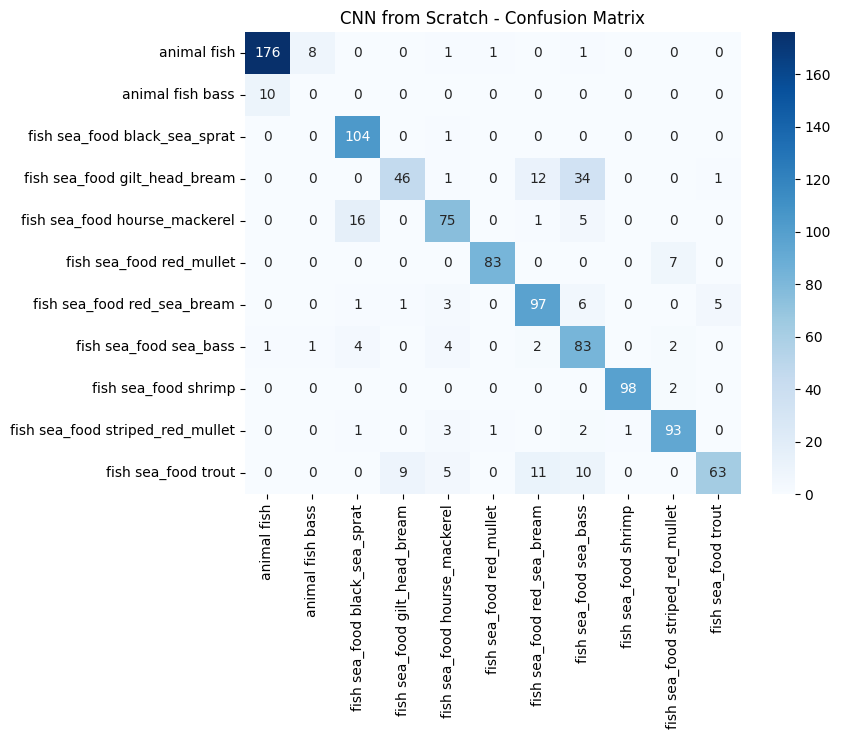

              Model  Validation Accuracy
0  CNN from Scratch             0.840659


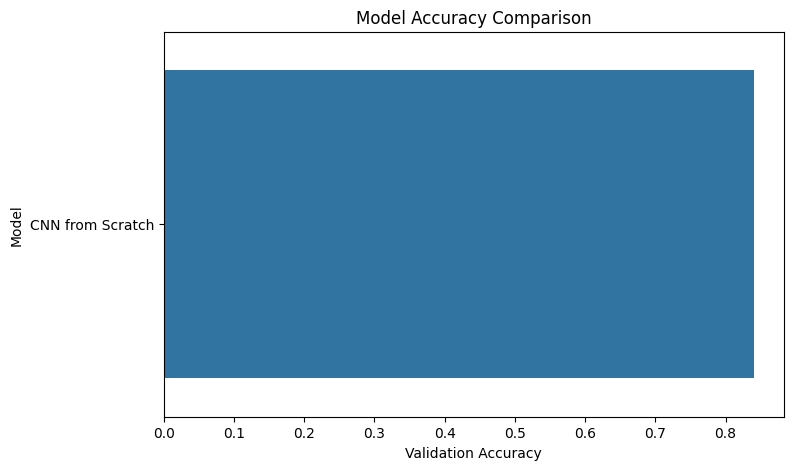

Best model: CNN from Scratch
Best model file path: CNN from Scratch_best.h5


In [18]:
# ================================================
# 6. Model Comparison (Updated for Deployment)
# ================================================
from tensorflow.keras.models import load_model
cnn_model = load_model('/content/cnn_best.h5')
acc_cnn = evaluate_model(cnn_model, val_gen, "CNN from Scratch")
results = []
results.append(("CNN from Scratch", acc_cnn))
df_results = pd.DataFrame(results, columns=['Model', 'Validation Accuracy'])
df_results = df_results.sort_values(by='Validation Accuracy', ascending=False)
print(df_results)

plt.figure(figsize=(8,5))
sns.barplot(x='Validation Accuracy', y='Model', data=df_results)
plt.title('Model Accuracy Comparison')
plt.show()

# Save the best model name for reference
best_model_name = df_results.iloc[0]['Model']
print(f"Best model: {best_model_name}")

# If you saved each model as '{ModelName}_best.h5', you can find the file
best_model_path = f"{best_model_name}_best.h5"
print(f"Best model file path: {best_model_path}")


In [22]:
# ================================================
# 7. Test on Uploaded Image (Updated)
# ================================================

# Load your best trained model directly
model_path = "cnn_best.h5"  # or your best pre-trained model file
final_model = tf.keras.models.load_model(model_path)

# Upload an image for testing
from google.colab import files
uploaded_img = files.upload()

# Get image path and preprocess
img_path = list(uploaded_img.keys())[0]
img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
img_array = tf.keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = final_model.predict(img_array)
pred_class = np.argmax(pred)

# Use the same class labels from your training generator
labels = list(train_gen.class_indices.keys())

print(f"Prediction: {labels[pred_class]} | Confidence: {np.max(pred):.2f}")


Saving 00ZR1T3Q2G5Z.jpg to 00ZR1T3Q2G5Z.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Prediction: animal fish | Confidence: 1.00
